<a href="https://colab.research.google.com/github/kongenikhil/Kaggle_DataSet_Files/blob/master/Titanic_dataset_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# setting the data 
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()


In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets list
! kaggle competitions download -c titanic

In [2]:
# imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Reading the data


In [3]:
titanic_data = pd.read_csv('/content/train.csv')
titanic_data_test = pd.read_csv('/content/test.csv')
print(titanic_data.info())
titanic_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

# Cleaning the Data set 

## There are 4 types in cleaning 

1. Correcting
2. Completing 
3. Creating ( feature engineering ) 
4. Converting ( formatting ) 

In [4]:
# Checking for any abnormal values 
titanic_data_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## No abnoraml values found moving to Completeing i.e checking for null values 

In [6]:
# Train value imputing 
print(titanic_data.isna().sum())
total_values = titanic_data.shape[0]
# checking % of missing values 
age = titanic_data['Age'].isna().sum()/total_values * 100
Cabin = titanic_data['Cabin'].isna().sum()/total_values * 100 
print('Missing values in Age is {}'.format(age))
print('Missing values in Cabin is {}'.format(Cabin))

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Missing values in Age is 19.865319865319865
Missing values in Cabin is 77.10437710437711


 Cabin column has  77% null value's  , Hence we drop it 
 In Age column we impute the median , 
 In Embark columns since only two are missing we can easily replace them by mode 

In [7]:
# Also along with Cabin , Ticket and passenger id are useless for analysis hence we drop them 
drop_columns = ['Cabin','PassengerId','Ticket'       ] 
titanic_data = titanic_data.drop(columns=drop_columns)
titanic_data_test = titanic_data_test.drop(columns=drop_columns)

In [8]:
# Filling Missing values 
titanic_data['Age'].fillna(titanic_data['Age'].median(),inplace=True,)
mode_embarked = titanic_data['Embarked'].mode()[0]
titanic_data['Embarked'].fillna(mode_embarked,inplace=True)

In [9]:
# checking for any missing values 
titanic_data.isna().sum()


Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Cleaning the test data set 

In [10]:
titanic_data_test.isna().sum()

Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [11]:
titanic_data_test['Age'].fillna(titanic_data_test['Age'].median(),inplace=True)
titanic_data_test['Fare'].fillna(titanic_data_test['Fare'].mode(),inplace=True)

In [12]:
titanic_data_test.isna().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

## Feature Engineering 


In [13]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [14]:
# Family size can be extracted from sibsp ( siblings or spouse ) and Parch( parents and children ) columns 
titanic_data['Family_size'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1

In [15]:
titanic_data_fe = titanic_data.copy(deep=True) # making a copy as i can revert here in case of an error 
# this copy keeping practice is not advisable for very large databases that run into GB's. 

0    8.05
dtype: float64

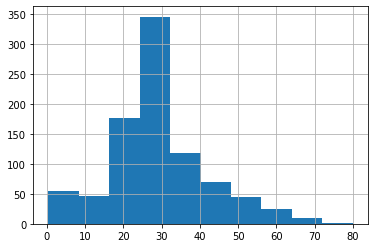

In [16]:

titanic_data_fe['Age'].hist() 
plt.plot()
titanic_data_fe['Fare'].mode()

In [17]:
# performing Binning on Age and Fare as they are continous , skewed distribution variables 
titanic_data_fe['AgeBin'] = pd.cut(titanic_data_fe['Age'].astype(int), 5)

In [18]:
titanic_data_fe['AgeBin'] # Cut ensures equi-spaced bins 

0      (16.0, 32.0]
1      (32.0, 48.0]
2      (16.0, 32.0]
3      (32.0, 48.0]
4      (32.0, 48.0]
           ...     
886    (16.0, 32.0]
887    (16.0, 32.0]
888    (16.0, 32.0]
889    (16.0, 32.0]
890    (16.0, 32.0]
Name: AgeBin, Length: 891, dtype: category
Categories (5, interval[float64]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] <
                                    (64.0, 80.0]]

In [19]:
titanic_data_fe['FareBin'] = pd.qcut(titanic_data_fe['Fare'], 4)
titanic_data_fe # q cut ensures equal distribution of values in bins 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size,AgeBin,FareBin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,"(16.0, 32.0]","(-0.001, 7.91]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,"(32.0, 48.0]","(31.0, 512.329]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,"(16.0, 32.0]","(7.91, 14.454]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,"(32.0, 48.0]","(31.0, 512.329]"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,"(32.0, 48.0]","(7.91, 14.454]"
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,1,"(16.0, 32.0]","(7.91, 14.454]"
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1,"(16.0, 32.0]","(14.454, 31.0]"
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S,4,"(16.0, 32.0]","(14.454, 31.0]"
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1,"(16.0, 32.0]","(14.454, 31.0]"


In [20]:
titanic_data_fe['FareBin'].value_counts()

(7.91, 14.454]     224
(-0.001, 7.91]     223
(31.0, 512.329]    222
(14.454, 31.0]     222
Name: FareBin, dtype: int64

In [21]:
names = titanic_data_fe['Name'].str.split(', ',expand=True)[1]
names
title = names.str.split('.',expand=True)[0]
title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Mme               1
Capt              1
Sir               1
Ms                1
Don               1
Lady              1
the Countess      1
Jonkheer          1
Name: 0, dtype: int64

In [22]:
# Assigning values that occur less than 10 times as 'Misc'
Misc_titles = title.value_counts() < 10 
titles = title.apply(lambda x : 'Misc' if Misc_titles[x] == True else x )

In [23]:
# Adding names and title to the feature engineerd data frame
titanic_data_fe['title'] = titles
titanic_data_fe['names'] = names 

In [24]:
# Dropping Name , siblingns and parents , age ,Fare columns as necessary bins have been created
titanic_data_fe = titanic_data_fe.drop(columns=['Name','Age','SibSp','Parch','Fare'])

# # Encoding Labels

In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
titanic_data_fe.head()

,Survived,Pclass,Sex,Embarked,Family_size,AgeBin,FareBin,title,names
0,0,3,male,S,2,"(16.0, 32.0]","(-0.001, 7.91]",Mr,Mr. Owen Harris
1,1,1,female,C,2,"(32.0, 48.0]","(31.0, 512.329]",Mrs,Mrs. John Bradley (Florence Briggs Thayer)
2,1,3,female,S,1,"(16.0, 32.0]","(7.91, 14.454]",Miss,Miss. Laina
3,1,1,female,S,2,"(32.0, 48.0]","(31.0, 512.329]",Mrs,Mrs. Jacques Heath (Lily May Peel)
4,0,3,male,S,1,"(32.0, 48.0]","(7.91, 14.454]",Mr,Mr. William Henry


In [26]:
# Dropping the Name as its Not useful  for analysis 
titanic_data_fe = titanic_data_fe.drop(columns=['names'])
# Also we convert 'Pclass' columns to a category column [As the Pclass represents the level , hence its actual representation is a category 
# and not an integer value]
titanic_data_fe['Pclass'] = titanic_data_fe['Pclass'].astype('category')


In [27]:
titanic_data_dummies = pd.get_dummies(titanic_data_fe,drop_first=True)
titanic_data_dummies

,Survived,Family_size,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,"AgeBin_(16.0, 32.0]","AgeBin_(32.0, 48.0]","AgeBin_(48.0, 64.0]","AgeBin_(64.0, 80.0]","FareBin_(7.91, 14.454]","FareBin_(14.454, 31.0]","FareBin_(31.0, 512.329]",title_Misc,title_Miss,title_Mr,title_Mrs
0,0,2,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0
1,1,2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
2,1,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0
3,1,2,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
4,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0
887,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0
888,0,4,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0
889,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0


# Feeding the Machine Learning Algorithm 

In [ ]:
# I use Logistic Regression ( As I am currently familiar with only this approach :) )

In [28]:
# Splitting into test and train data 
from sklearn.model_selection import train_test_split

y = titanic_data_dummies.pop('Survived')
X = titanic_data_dummies

X_test,X_train,y_test,y_train = train_test_split(X,y,test_size=0.3,random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()

In [ ]:
y_train = y_train.values.reshape(-1,1)
predict = logistic_reg.fit(X_train,y_train)


In [32]:
predictions = predict.predict(X_test)
predictions

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,

In [35]:
# Validating the model , by measuring the precision,recall and f-score
from sklearn.metrics import precision_recall_fscore_support 
score = precision_recall_fscore_support(y_test,predictions)
score

(array([0.81796117, 0.73933649]),
 array([0.85969388, 0.67532468]),
 array([0.83830846, 0.70588235]),
 array([392, 231]))

In [38]:
# Measuring the Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,predictions)
accuracy

0.7913322632423756

In [40]:
# confusion matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)
cm

array([[337,  55],
       [ 75, 156]])

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       392
           1       0.74      0.68      0.71       231

    accuracy                           0.79       623
   macro avg       0.78      0.77      0.77       623
weighted avg       0.79      0.79      0.79       623

